```python
            "delta":(  2,  4),
            "theta":(  4,  8),
            "alpha":(  8, 12),
            "beta": ( 15, 30),
            "gamma":( 30,150),
            "low gamma": (30, 80),
            "high gamma":(80,150),
            "lowpass":(1,200),
            "highpass":(200,500)
```

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import EEGAnalysis as ea

## data import

In [2]:
datadir = "../../Data"
resultdir = "../../Result"
patientName = "Chen Zhou"
fs = 2000

targetexp = "180901-3-10"

datacontainer = ea.CompactDataContainer(
    datadir, resultdir, patientName, 
    targetexp, fs, (-2, 10)
)

## total power

In [3]:
chidx = 108
ch_split = datacontainer.group_channel_by_marker(chidx, "grating")

frange = np.logspace(np.log10(1), np.log10(200), 40)
%time dwt_result = ea.dwt(ch_split, fs, frange, reflection=True)
pxx = ea.power.dwt_power(dwt_result, fs, baseline=(0.5,1.5))  # baseline normalization
pxx = ea.power.dwt_power(dwt_result, fs)  # zscore normalization

CPU times: user 4.5 s, sys: 456 ms, total: 4.96 s
Wall time: 5.02 s


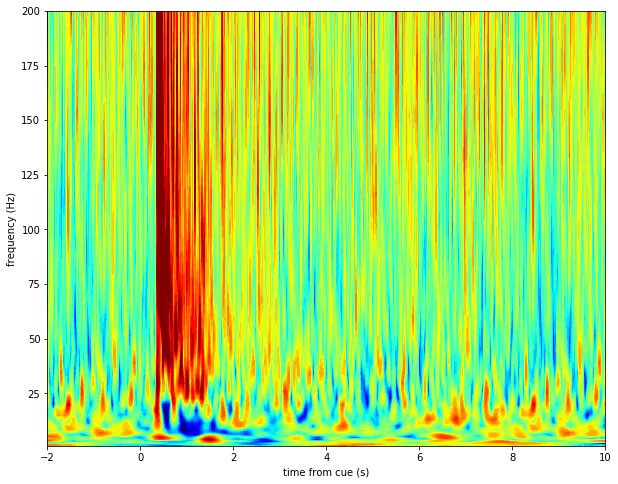

In [25]:
# tf domain
plt.figure(figsize=(10,8))
tspec = np.linspace(-2,10,np.size(pxx[:,::10],1))
plt.contourf(tspec, frange, pxx[:,::10], 50, cmap=plt.get_cmap("jet"))
plt.xlabel("time from cue (s)")
plt.ylabel("frequency (Hz)")
# plt.title("180901-3-10-channel109")
plt.clim([-3,3])
# plt.xlim([-1,2])
plt.show()
plt.close('all')

## channel preview

In [4]:
chidx = 98
trange = (170.0, 210.0)
# ch_split = datacontainer.group_channel_by_marker(chidx, "grating")
starter = int(trange[0] * fs)
gap = int((trange[1]-trange[0]) * fs)
target_ch = datacontainer.channels[chidx, starter:starter+gap]

frange = np.logspace(np.log10(1), np.log10(200), 40)
%time dwt_result = ea.dwt(target_ch, fs, frange, reflection=True)
pxx = ea.power.dwt_power(dwt_result, fs, baseline=(0.5,1.5))  # baseline normalization
pxx = ea.power.dwt_power(dwt_result, fs)  # zscore normalization

CPU times: user 2.4 s, sys: 138 ms, total: 2.54 s
Wall time: 2.57 s


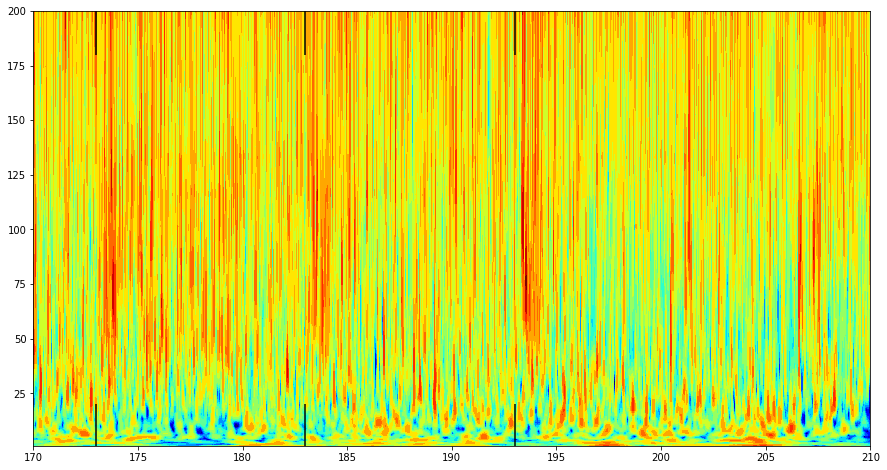

In [33]:
plt.figure(figsize=(15,8))
tspec = np.linspace(trange[0],trange[1], np.size(pxx, 1))
plt.contourf(tspec, frange, pxx, 40, cmap=plt.get_cmap("jet"))

plt.vlines(datacontainer.markers["grating"][0][0][0, :], 180, 200)
plt.vlines(datacontainer.markers["grating"][0][0][0, :], 1, 20)

plt.xlim(trange)
plt.clim([-3,3])
plt.show()

## ITPC

In [5]:
chidx = 108
ch_split = datacontainer.group_channel_by_marker(chidx, "grating")

frange = np.logspace(np.log10(1), np.log10(200), 40)
%time dwt_result = ea.dwt(ch_split, fs, frange, reflection=True)

itpc = ea.phase.dwt_itpc(dwt_result)

CPU times: user 4.58 s, sys: 409 ms, total: 4.99 s
Wall time: 5.07 s


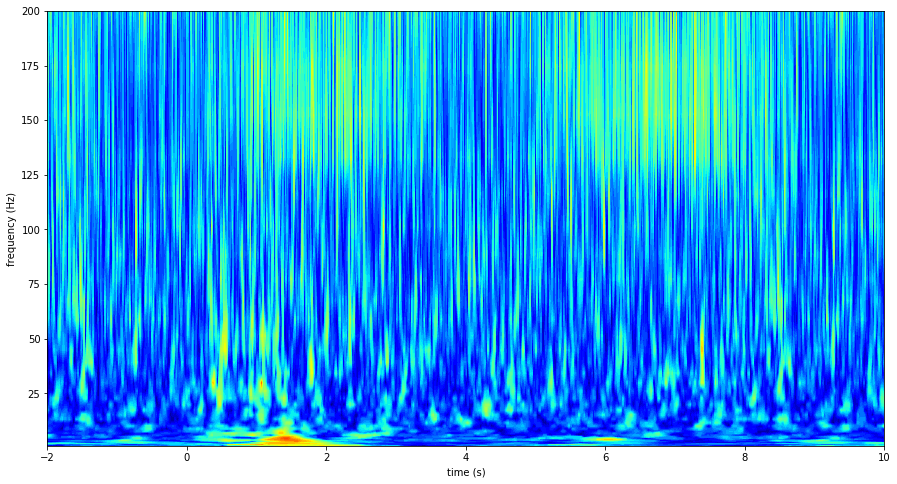

In [7]:
plt.figure(figsize=(15,8))
plt.contourf(np.linspace(-2,10, np.size(itpc, 1)), frange, itpc, 40, cmap=plt.get_cmap("jet"))

plt.xlabel("time (s)")
plt.ylabel("frequency (Hz)")
plt.clim([0,1])
plt.xlim([-2, 10])

# plt.show()
# plt.savefig("180901-3-10-channel109_grating_itpc_0_200.png", bbox_inches="tight")
plt.show()
plt.close("all")